In [1]:

import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import tensorflow as tf


In [ ]:
tips=sns.load_dataset("tips")
tips=pd.get_dummies(tips,drop_first=True)
X=tips.drop("tip",axis=1)
Y=tips["tip"]
X_train, X_test, y_train, y_test=train_test_split(X,Y,random_state=42,test_size=0.20)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

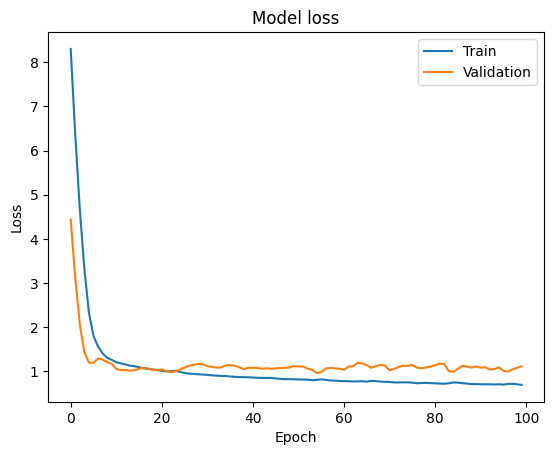

In [16]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## **Call Back Function for Early Stopping**

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

model=tf.keras.models.Sequential([
tf.keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
tf.keras.layers.Dense(32,activation='relu'),
tf.keras.layers.Dense(1)
                    ])
model.compile(optimizer="adam",loss='mean_squared_error')

early_stoping=EarlyStopping(patience=5)
history=model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1,
                  validation_data=(X_test,y_test),callbacks=[early_stoping])



Epoch 1/100
7/7 [==============================] - 8s 294ms/step - loss: 12.6457 - val_loss: 8.2097
Epoch 2/100
7/7 [==============================] - 0s 30ms/step - loss: 10.7527 - val_loss: 6.6934
Epoch 3/100
7/7 [==============================] - 0s 24ms/step - loss: 9.1228 - val_loss: 5.3921
Epoch 4/100
7/7 [==============================] - 0s 27ms/step - loss: 7.6373 - val_loss: 4.2855
Epoch 5/100
7/7 [==============================] - 0s 31ms/step - loss: 6.3631 - val_loss: 3.3065
Epoch 6/100
7/7 [==============================] - 0s 20ms/step - loss: 5.1166 - val_loss: 2.4977
Epoch 7/100
7/7 [==============================] - 0s 22ms/step - loss: 3.9948 - val_loss: 1.8886
Epoch 8/100
7/7 [==============================] - 0s 23ms/step - loss: 3.1357 - val_loss: 1.4618
Epoch 9/100
7/7 [==============================] - 0s 23ms/step - loss: 2.4336 - val_loss: 1.2388
Epoch 10/100
7/7 [==============================] - 0s 21ms/step - loss: 1.9602 - val_loss: 1.1443
Epoch 11/100
7/7

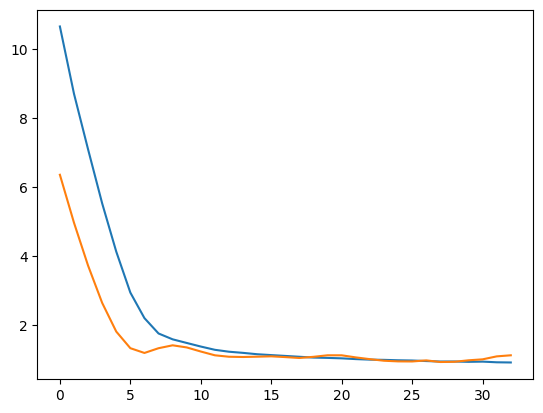

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])